## Observations and Insights 

In [156]:
# Include this line to make plots interactive
%matplotlib notebook

# Dependencies and Setup
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy import stats
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_tbl_df=pd.merge(mouse_metadata,study_results,on="Mouse ID",how="left")

# Display the data table for preview
merged_tbl_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [157]:
# Get the number of mice.
Num_mice=len(merged_tbl_df["Mouse ID"].value_counts())
Num_mice

249

In [158]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merged_tbl_df[merged_tbl_df.duplicated(["Mouse ID","Timepoint"])]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [159]:
# Optional: Get all the data for the duplicate mouse ID. 
#According to above tabler, duplicate mouse Id is g989

merged_tbl_df[merged_tbl_df["Mouse ID"]=="g989"]



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [160]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID. that means this table should exclude above
clean_data=merged_tbl_df[merged_tbl_df["Mouse ID"]!="g989"]
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [161]:
# Checking the number of mice in the clean DataFrame.
number_of_mice=clean_data["Mouse ID"].nunique()
number_of_mice

248

## Summary Statistics

In [162]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

#mean
mean=clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()

#median
median=clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()

#Variance
variance=clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()

##standard deviation
stdv=clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()

#SEM
sem=clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.
summary_df=pd.DataFrame({"Mean":mean,"Median":median,"Variance":variance,"standard deviation":stdv,"SEM":sem})
summary_df

,Mean,Median,Variance,standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [163]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
Sum_stat=clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"]
# Using the aggregation method, produce the same summary statistics in a single line
Sum_stat.agg(["mean","median","var","std","sem"])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [164]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
regimen_df=pd.DataFrame(clean_data.groupby("Drug Regimen").count()).reset_index()
#bar_plot_panda
# Just to get two columns appear, Time points and the Drug Regimen
two_columns=regimen_df[["Drug Regimen", "Timepoint"]]
two_columns= two_columns.set_index("Drug Regimen")
two_columns


,Timepoint
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,148
Ramicane,228
Stelasyn,181


<IPython.core.display.Javascript object>


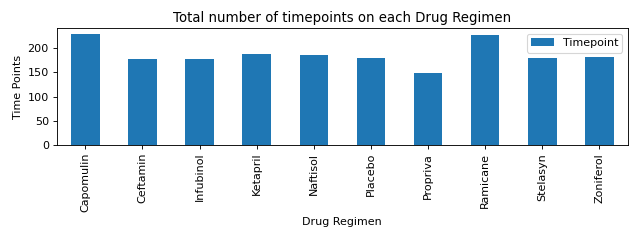

In [165]:
bar_plot=two_columns.plot(kind="bar", figsize=(8,3))

#Setting up the tile and axis names
plt.title("Total number of timepoints on each Drug Regimen")
plt.ylabel("Time Points")
plt.xlabel("Drug Regimen")
plt.show()
plt.tight_layout()

In [166]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

#get the Drug Regimen names into a list for X axis
X_drug_list=two_columns.index.tolist()
X_drug_list


['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

<IPython.core.display.Javascript object>


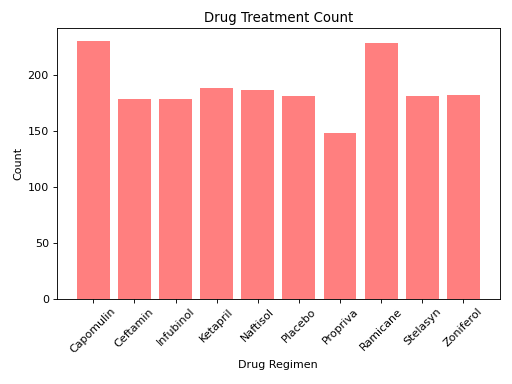

In [172]:
#below is the list of number of total Time Points
Y_num_of_timeP=[230, 178, 178, 188, 186, 181, 148, 228, 181, 182]
Y_num_of_timeP

pyplot=plt.bar(X_drug_list,Y_num_of_timeP,color = 'r', alpha = 0.5, align = "center")

tick_locations = [value for value in X_drug_list]
plt.xticks(rotation=45)

plt.title("Drug Treatment Count")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")
plt.tight_layout()

In [174]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# run the data fram from clean data df as Mouse Ids are mostly duplicating
gender_df=pd.DataFrame(clean_data.groupby("Sex").count()).reset_index()
gender_df

# Just to get two columns appear, Sex and the Mouse ID
two_columns1=gender_df[["Sex", "Mouse ID"]]
two_columns1 = two_columns1.set_index("Sex")
two_columns1



,Mouse ID
Sex,
Female,922
Male,958


<IPython.core.display.Javascript object>


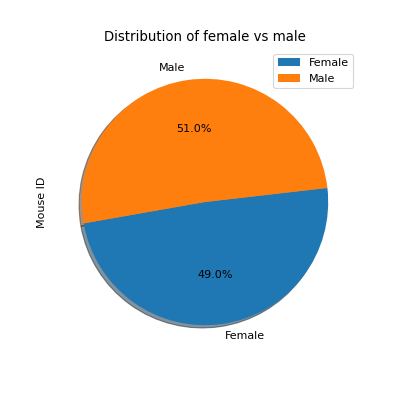

Text(0.5, 1.0, 'Distribution of female vs male')

In [175]:
#show pie plot
two_columns1.plot(kind="pie",y="Mouse ID",autopct="%1.1f%%",startangle=190,shadow=True,figsize=(5, 5))

plt.title("Distribution of female vs male")


<IPython.core.display.Javascript object>


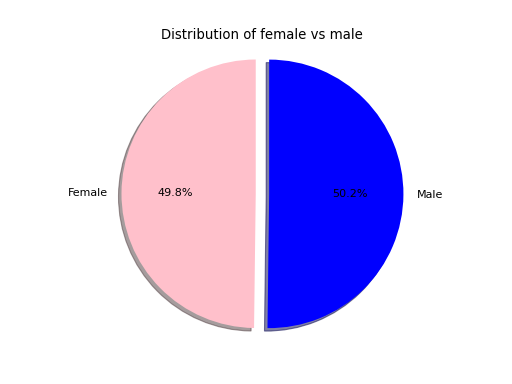

(-1.2067664421469415,
 1.1059346302803437,
 -1.1016946163825478,
 1.1007415699207657)

In [176]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female", "Male"]
sizes = [124, 125]
colors = ["pink", "blue"]
explode = (0.1, 0)

plt.pie(sizes,explode=explode,labels = labels, colors = colors,
       autopct = "%1.1f%%", shadow=True, startangle=90)

plt.title("Distribution of female vs male")

plt.axis("equal")


## Quartiles, Outliers and Boxplots

In [177]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin==== ttotal number of Mouse ID count should=814


# fist find the last (greatest) time point for each mouse by sorting the data 
greatest_df=clean_data[clean_data["Drug Regimen"].isin(["Capomulin","Ramicane","Infubinol","Ceftamin"])]
greatest_df=greatest_df.sort_values(["Timepoint"],ascending=False)
greatest_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1872,z581,Infubinol,Female,24,25,45,62.754451,3
800,e476,Infubinol,Male,23,26,45,62.435404,1
154,c758,Ramicane,Male,9,17,45,33.397653,1
440,i557,Capomulin,Female,1,24,45,47.685963,1
144,m957,Capomulin,Female,3,19,45,33.329098,1
...,...,...,...,...,...,...,...,...
75,z578,Ramicane,Male,11,16,0,45.000000,0
1113,l490,Ceftamin,Male,24,26,0,45.000000,0
1120,l558,Ceftamin,Female,13,30,0,45.000000,0
1123,l661,Ceftamin,Male,18,26,0,45.000000,0


In [178]:
#*** Mouse ID, Drug Regimen, Tumor Volume and Timepoint are the four columns we need and drop the other columns
narrow_greatest_df=greatest_df[["Drug Regimen","Mouse ID","Timepoint","Tumor Volume (mm3)"]]
narrow_greatest_df


,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
1872,Infubinol,z581,45,62.754451
800,Infubinol,e476,45,62.435404
154,Ramicane,c758,45,33.397653
440,Capomulin,i557,45,47.685963
144,Capomulin,m957,45,33.329098
...,...,...,...,...
75,Ramicane,z578,0,45.000000
1113,Ceftamin,l490,0,45.000000
1120,Ceftamin,l558,0,45.000000
1123,Ceftamin,l661,0,45.000000


In [179]:
# Start by getting the last (greatest) timepoint for each mouse
# Capomulin, Ramicane, Infubinol, and Ceftamin
# start with Capomulin, filter the Capomulin data
Capomulin=narrow_greatest_df.loc[narrow_greatest_df["Drug Regimen"]=="Capomulin"]

#drop the duplicate Mouse IDs and organise the data by Timepoint descending order to find highest
Capomulin_clean=Capomulin.drop_duplicates(subset="Mouse ID")
Capomulin_clean=Capomulin_clean.sort_values("Timepoint",ascending=False)
Capomulin_clean


,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
440,Capomulin,i557,45,47.685963
337,Capomulin,j119,45,38.125164
19,Capomulin,s185,45,23.343598
39,Capomulin,m601,45,28.430964
29,Capomulin,x401,45,28.484033
390,Capomulin,r944,45,41.581521
380,Capomulin,l509,45,41.483008
370,Capomulin,s710,45,40.728578
360,Capomulin,g316,45,40.159220
350,Capomulin,v923,45,40.658124


In [180]:
#get Capomulin Tumor Volume in to a list
Capomulin_list=Capomulin_clean["Tumor Volume (mm3)"]
Capomulin_list


440     47.685963
337     38.125164
19      23.343598
39      28.430964
29      28.484033
390     41.581521
380     41.483008
370     40.728578
360     40.159220
350     40.658124
144     33.329098
204     37.311846
309     38.982878
224     36.041047
299     38.939633
282     38.846876
244     37.074024
164     34.455298
104     31.023923
124     31.896238
134     32.377357
317     38.753265
64      30.485985
1455    46.539206
340     39.952347
Name: Tumor Volume (mm3), dtype: float64

In [181]:
# quartile & outlier calculations for Capomulin
quartiles = Capomulin_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume for Capomulin is: {lowerq}")
print(f"The upper quartile of Tumor Volume for Capomulin is: {upperq}")
print(f"The interquartile range of Tumor Volume for Capomulin is: {iqr}")
print(f"The median of Tumor Volume for Capomulin is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Tumor Volume for Capomulin is: 32.37735684
The upper quartile of Tumor Volume for Capomulin is: 40.1592203
The interquartile range of Tumor Volume for Capomulin is: 7.781863460000004
The median of Tumor Volume for Capomulin is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [182]:
#Ramicane

Ramicane=narrow_greatest_df.loc[narrow_greatest_df["Drug Regimen"]=="Ramicane"]

#drop the duplicates
Ramicane_clean=Ramicane.drop_duplicates(subset="Mouse ID")
Ramicane_clean=Ramicane_clean.sort_values("Timepoint",ascending=False)
Ramicane_clean

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
154,Ramicane,c758,45,33.397653
214,Ramicane,a520,45,38.810366
49,Ramicane,g791,45,29.128472
9,Ramicane,k403,45,22.050126
59,Ramicane,s508,45,30.276232
400,Ramicane,e662,45,40.659006
174,Ramicane,a644,45,32.978522
184,Ramicane,i177,45,33.562402
194,Ramicane,j989,45,36.134852
114,Ramicane,n364,45,31.095335


In [183]:
#get Ramicane tumor volume into a list
Ramicane_list=Ramicane_clean["Tumor Volume (mm3)"]
Ramicane_list

154    33.397653
214    38.810366
49     29.128472
9      22.050126
59     30.276232
400    40.659006
174    32.978522
184    33.562402
194    36.134852
114    31.095335
327    38.407618
234    37.225650
272    37.311236
254    36.374510
410    40.667713
420    45.220869
430    43.047543
74     30.564625
84     30.638696
94     31.560470
262    36.561652
289    38.342008
447    43.419381
453    44.183451
449    43.166373
Name: Tumor Volume (mm3), dtype: float64

In [184]:
# quartile & outlier calculations for Ramicane
quartiles = Ramicane_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume for Ramicane is: {lowerq}")
print(f"The upper quartile of Tumor Volume for Ramicane is: {upperq}")
print(f"The interquartile range of Tumor Volume for Ramicane is: {iqr}")
print(f"The median of Tumor Volume for Ramicane is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Tumor Volume for Ramicane is: 31.56046955
The upper quartile of Tumor Volume for Ramicane is: 40.65900627
The interquartile range of Tumor Volume for Ramicane is: 9.098536719999998
The median of Tumor Volume for Ramicane is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [185]:
#Infubinol

Infubinol=narrow_greatest_df.loc[narrow_greatest_df["Drug Regimen"]=="Infubinol"]

#drop the duplicates
Infubinol_clean=Infubinol.drop_duplicates(subset="Mouse ID")
Infubinol_clean=Infubinol_clean.sort_values("Timepoint",ascending=False)
Infubinol_clean

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
1872,Infubinol,z581,45,62.754451
463,Infubinol,a203,45,67.973419
473,Infubinol,a251,45,65.525743
637,Infubinol,c139,45,72.226731
834,Infubinol,f345,45,60.918767
1053,Infubinol,k483,45,66.196912
540,Infubinol,a685,45,66.083066
1813,Infubinol,y163,45,67.685569
800,Infubinol,e476,45,62.435404
949,Infubinol,i386,40,67.289621


In [186]:
#get Infubinol tumor volume into a list
Infubinol_list=Infubinol_clean["Tumor Volume (mm3)"]
Infubinol_list

1872    62.754451
463     67.973419
473     65.525743
637     72.226731
834     60.918767
1053    66.196912
540     66.083066
1813    67.685569
800     62.435404
949     67.289621
1076    62.117279
1312    55.629428
1726    58.268442
742     60.969711
1397    54.656549
530     57.031862
1225    60.165180
1485    55.650681
1683    50.005138
1632    54.048608
1640    51.542431
669     36.321346
1314    45.699331
1616    46.250112
1205    47.010364
Name: Tumor Volume (mm3), dtype: float64

In [187]:
# quartile & outlier calculations for Infubinol
quartiles = Infubinol_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume for Infubinol is: {lowerq}")
print(f"The upper quartile of Tumor Volume for Infubinol is: {upperq}")
print(f"The interquartile range of Tumor Volume for Infubinol is: {iqr}")
print(f"The median of Tumor Volume for Infubinol is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Tumor Volume for Infubinol is: 54.04860769
The upper quartile of Tumor Volume for Infubinol is: 65.52574285
The interquartile range of Tumor Volume for Infubinol is: 11.477135160000003
The median of Tumor Volume for Infubinol is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [188]:
#Ceftamin

Ceftamin=narrow_greatest_df.loc[narrow_greatest_df["Drug Regimen"]=="Ceftamin"]

#drop the duplicates
Ceftamin_clean=Ceftamin.drop_duplicates(subset="Mouse ID")
Ceftamin_clean=Ceftamin_clean.sort_values("Timepoint",ascending=False)
Ceftamin_clean

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
493,Ceftamin,a275,45,62.999356
1845,Ceftamin,y769,45,68.594745
1260,Ceftamin,o287,45,59.741901
1670,Ceftamin,w151,45,67.527482
1855,Ceftamin,y865,45,64.729837
1379,Ceftamin,p438,45,61.433892
1797,Ceftamin,x822,45,61.386660
1773,Ceftamin,x581,45,64.634949
1162,Ceftamin,l733,45,64.299830
1112,Ceftamin,l471,45,67.748662


In [189]:
#get Ceftamin tumor volume into a list
Ceftamin_list=Ceftamin_clean["Tumor Volume (mm3)"]
Ceftamin_list

493     62.999356
1845    68.594745
1260    59.741901
1670    67.527482
1855    64.729837
1379    61.433892
1797    61.386660
1773    64.634949
1162    64.299830
1112    67.748662
1033    68.923185
993     61.849023
1132    59.851956
1406    64.192341
1119    57.918381
617     55.742829
1582    52.925348
600     56.057749
840     48.722078
1122    46.784535
940     47.784682
1743    45.000000
594     45.000000
1551    45.000000
1583    45.000000
Name: Tumor Volume (mm3), dtype: float64

In [190]:
# quartile & outlier calculations for Ceftamin
quartiles = Ceftamin_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume for Ceftamin is: {lowerq}")
print(f"The upper quartile of Tumor Volume for Ceftamin is: {upperq}")
print(f"The interquartile range of Tumor Volume for Ceftamin is: {iqr}")
print(f"The median of Tumor Volume for Ceftamin is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Tumor Volume for Ceftamin is: 48.72207785
The upper quartile of Tumor Volume for Ceftamin is: 64.29983003
The interquartile range of Tumor Volume for Ceftamin is: 15.577752179999997
The median of Tumor Volume for Ceftamin is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


<IPython.core.display.Javascript object>


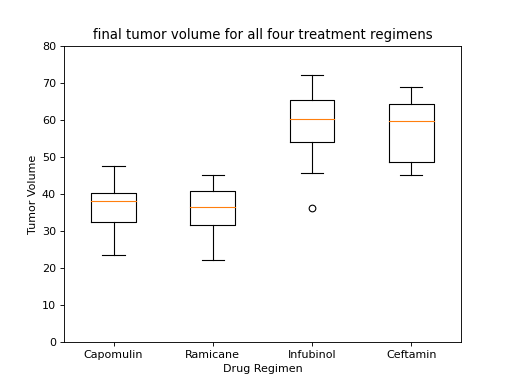

In [191]:
# Creating box plot for all forur Regimens
fig1, ax1 = plt.subplots()
ax1.set_title("final tumor volume for all four treatment regimens")
ax1.set_ylabel("Tumor Volume")
ax1.set_xlabel("Drug Regimen")
regimen = [Capomulin_list, Ramicane_list, Infubinol_list, Ceftamin_list]
plt.ylim(0, 80)

ax1.boxplot(regimen,labels=["Capomulin","Ramicane","Infubinol","Ceftamin",])

plt.show()

## Line and Scatter Plots

In [202]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#get Capomulin data mean find all the mouse id's treated with drug regimen Capomulin
mouse_treat_Capomulin=clean_data.loc[clean_data["Drug Regimen"]=="Capomulin"]
mouse_treat_Capomulin.value_counts("Mouse ID")

Mouse ID
b128    10
b742    10
x401    10
w914    10
v923    10
u364    10
t565    10
s710    10
s185    10
r944    10
r554    10
m957    10
m601    10
l897    10
l509    10
j119    10
i738    10
i557    10
g316    10
g288    10
y793    10
j246     8
f966     5
r157     4
w150     3
dtype: int64

In [203]:
#pick one mouse and do the line chart
u364_mouse=clean_data.loc[clean_data["Mouse ID"]=="u364"]
u364_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
95,u364,Capomulin,Male,18,17,0,45.000000,0
96,u364,Capomulin,Male,18,17,5,45.760886,1
97,u364,Capomulin,Male,18,17,10,46.568417,2
98,u364,Capomulin,Male,18,17,15,47.212200,2
99,u364,Capomulin,Male,18,17,20,40.343948,2
100,u364,Capomulin,Male,18,17,25,35.503616,2
101,u364,Capomulin,Male,18,17,30,35.978334,2
102,u364,Capomulin,Male,18,17,35,35.459490,2
103,u364,Capomulin,Male,18,17,40,36.024138,2
104,u364,Capomulin,Male,18,17,45,31.023923,3


In [204]:
#Generate line chart

#define x and Y axis
y_axis=u364_mouse["Tumor Volume (mm3)"]
x_axis=u364_mouse["Timepoint"]

#do the line chart
plt.plot(x_axis,y_axis,marker ='o', color='blue', label="Sine")
plt.legend(loc="best")

#give a title and name the axis
plt.xlabel('Time Point')
plt.ylabel('Tumor Volume')
plt.title("Mouse u364 Tumor Volume vs. Time Point with Drug Regimen Capomulin")
plt.show()


In [205]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#calculate this using previous table created for Capomulin drug regimen
regimen_cap=mouse_treat_Capomulin.groupby(["Mouse ID"]).mean()
regimen_cap.head(20)

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.70
b742,7.0,21.0,22.5,40.083699,0.00
f966,16.0,17.0,10.0,36.505973,0.00
g288,3.0,19.0,22.5,41.990097,0.80
g316,22.0,22.0,22.5,44.613344,1.00
i557,1.0,24.0,22.5,44.805810,0.20
i738,23.0,20.0,22.5,39.141053,0.60
j119,7.0,23.0,22.5,44.465236,0.60
j246,21.0,21.0,17.5,43.216925,0.25


<IPython.core.display.Javascript object>


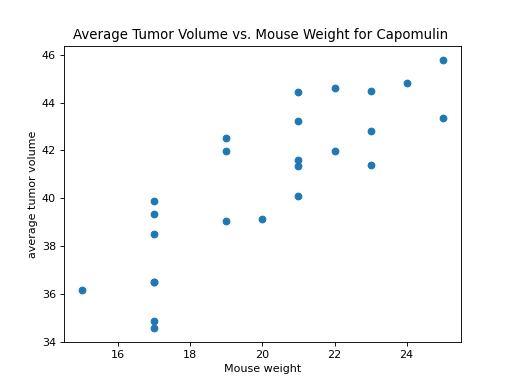

In [206]:
#Calculate average tumer volume
Ave_tumor_vol=regimen_cap["Tumor Volume (mm3)"]
Ave_wieght=regimen_cap["Weight (g)"]

plt.scatter(Ave_wieght,Ave_tumor_vol)
plt.xlabel("Mouse weight")
plt.ylabel("average tumor volume")
plt.title("Average Tumor Volume vs. Mouse Weight for Capomulin ")
plt.show()

## Correlation and Regression

<IPython.core.display.Javascript object>


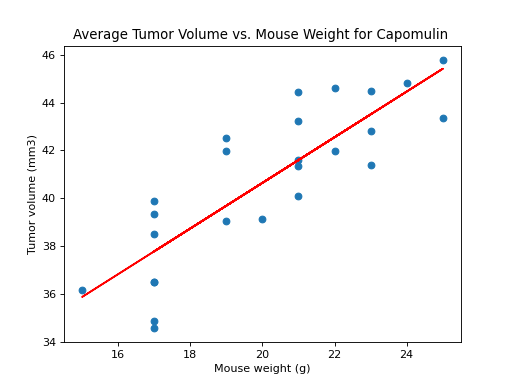

The correlation between both factors is 0.84
The r-squared is: 0.7088568047708723
y = 0.95x + 21.55


In [207]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#calculate the Correlation using the standard equation
Correlation=st.pearsonr(Ave_wieght,Ave_tumor_vol)


#Find Regression
(slope, intercept, rvalue, pvalue, stderr) =linregress(Ave_wieght,Ave_tumor_vol)
Regression=Ave_wieght*slope+intercept


#Create the scatter and the plot
plt.scatter(Ave_wieght,Ave_tumor_vol)
plt.plot(Ave_wieght,Regression,"r-")

#Name the axis and Title
plt.xlabel('Normalized Blood Pressure')
plt.ylabel('1Y_Disease_Progress')

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor volume (mm3)")
plt.title("Average Tumor Volume vs. Mouse Weight for Capomulin ")


print(f"The correlation between both factors is {round(Correlation[0],2)}")
print(f"The r-squared is: {rvalue**2}")
print(line_eq)